In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install fastbook 
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 5.3 MB/s eta 0:00:00


In [4]:
!pip install dtreeviz
import fastbook

In [5]:
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype ,is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *  

from IPython.display import  Image,display_svg,SVG
pd.options.display.max_rows=20
pd.options.display.max_columns=8


In [6]:
!pip install kaggle

In [7]:
!pip install opendatasets
import opendatasets as od

In [8]:
od.download("https://www.kaggle.com/competitions/bluebook-for-bulldozers/data")
#username	"adithyalbhat" key	"b059a26f9df500001633aca453f91d1e"

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  adithyalbhat


Your Kaggle Key:

  ································


100%|██████████| 48.4M/48.4M [00:01<00:00, 30.9MB/s]



Extracting archive ./bluebook-for-bulldozers/bluebook-for-bulldozers.zip to ./bluebook-for-bulldozers


In [9]:
!ls /kaggle/working/bluebook-for-bulldozers


'Data Dictionary.xlsx'	 TrainAndValid.7z    Valid.zip
 Machine_Appendix.csv	 TrainAndValid.csv   ValidSolution.csv
 Test.csv		 TrainAndValid.zip   median_benchmark.csv
 Train.7z		 Valid.7z	     random_forest_benchmark_test.csv
 Train.zip		 Valid.csv


In [10]:
path=Path("/kaggle/working/bluebook-for-bulldozers")

In [11]:
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)

In [12]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [13]:
df.columns


Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [14]:
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [15]:
sizes='Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'

In [16]:
df['ProductSize']=df['ProductSize'].astype('category')

In [17]:
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
     

/tmp/ipykernel_32/3533861808.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.


In [18]:
df['ProductSize'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 412698 entries, 0 to 412697
Series name: ProductSize
Non-Null Count   Dtype   
--------------   -----   
196093 non-null  category
dtypes: category(1)
memory usage: 403.4 KB


In [19]:
dep_var='SalePrice'

In [20]:
df[dep_var].head(5)

0    66000.0
1    57000.0
2    10000.0
3    38500.0
4    11000.0
Name: SalePrice, dtype: float64

In [21]:
df[dep_var]=np.log(df[dep_var])

In [22]:
df[dep_var].head(5)

0    11.097410
1    10.950807
2     9.210340
3    10.558414
4     9.305651
Name: SalePrice, dtype: float64

In [23]:
' '.join( o for o in df.columns if o.startswith('sale'))

'saledate'

In [24]:
'saleWeek saleYear saleMonth saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

'saleWeek saleYear saleMonth saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [25]:
df = add_datepart(df, 'saledate')

In [26]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [27]:
df_test = pd.read_csv(path/'Test.csv', low_memory=False)
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [28]:
df_test = add_datepart(df_test, 'saledate')
df_test.columns 

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [29]:
procs=[Categorify,FillMissing]


In [30]:
df['saleYear'].head(3)

0    2006
1    2004
2    2004
Name: saleYear, dtype: int64

In [31]:
cond= (df.saleYear <2011) | (df.saleMonth<10)
train_idx=np.where(cond)[0]
valid_idx=np.where(~cond)[0]

In [32]:
len(valid_idx)

7988

In [33]:
splits=(list(train_idx),list(valid_idx))

In [34]:
cont,cat = cont_cat_split(df,1,dep_var=dep_var)

In [35]:
to =  TabularPandas(df,procs,cat,cont,y_names=dep_var,splits=splits)

In [36]:
len(to.train)

404710

In [37]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [38]:
to1 = TabularPandas(df, procs, ['state', 'ProductGroup', 'Drive_System', 'Enclosure'], [], y_names=dep_var, splits=splits)

In [39]:
to1.show(3)

,state,ProductGroup,Drive_System,Enclosure,SalePrice
0,Alabama,WL,#na#,EROPS w AC,11.097410
1,North Carolina,WL,#na#,EROPS w AC,10.950807
2,New York,SSL,#na#,OROPS,9.210340


In [40]:
to[0:3]

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,...,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,...,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,...,1,1.077754e+09,1,1


In [41]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,...,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,...,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,...,1,1.077754e+09,1,1


In [42]:
to1[['state','ProductGroup','Drive_System','Enclosure']].head()

,state,ProductGroup,Drive_System,Enclosure
0,1,6,0,3
1,33,6,0,3
2,32,3,0,6
3,44,4,0,3
4,32,3,0,1


In [43]:
to1.items[['state','ProductGroup','Drive_System','Enclosure']].head()

,state,ProductGroup,Drive_System,Enclosure
0,1,6,0,3
1,33,6,0,3
2,32,3,0,6
3,44,4,0,3
4,32,3,0,1


In [44]:
to.classes['ProductSize']

['#na#', 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact']

In [45]:
#save_pickle(path/'tp.pkl',to)

In [46]:
#to = load_pickle(path/'tp.pkl')

In [47]:
xs,y=to.train.xs,to.train.y

In [48]:
valid_xs,valid_y=to.valid.xs,to.valid.y

In [49]:
len(xs),len(valid_xs),len(valid_y),len(y)

(404710, 7988, 7988, 404710)

In [50]:
m=DecisionTreeRegressor(max_leaf_nodes=6)
m.fit(xs.values,y.values)

DecisionTreeRegressor(max_leaf_nodes=6)

In [51]:
help(draw_tree)

Help on function draw_tree in module fastbook:

draw_tree(t, df, size=10, ratio=0.6, precision=0, **kwargs)



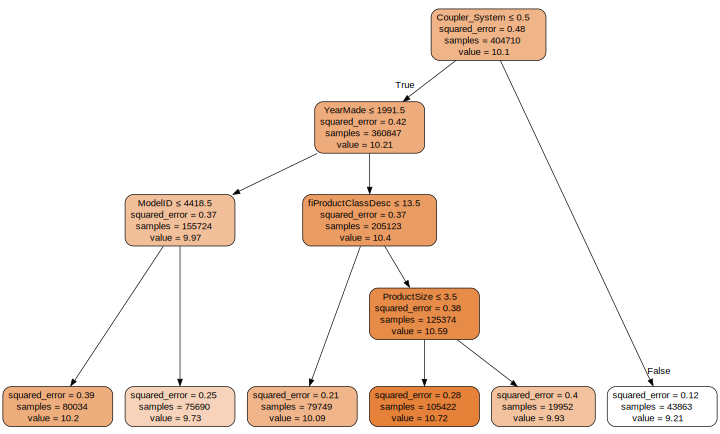

In [52]:
draw_tree(m,xs,size=10,leaves_parallel=True,precision=2)

from dtreeviz import dtreeviz
samp_idx = np.random.permutation(len(y))[:500]
viz_model=dtreeviz(m, X_train=xs.iloc[samp_idx],
                   y_train=y.iloc[samp_idx], 
                   feature_names=list(xs.columns),target_name= dep_var)
viz_model.view(fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
               orientation='LR')


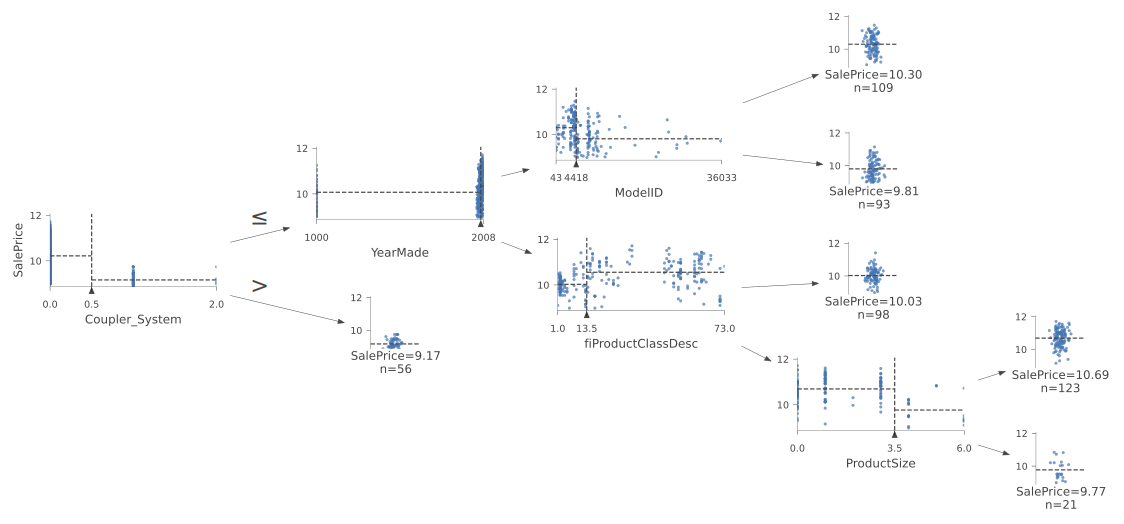

In [53]:
import dtreeviz
samp_idx = np.random.permutation(len(y))[:500]
viz_model=dtreeviz.model(m,
X_train=xs.iloc[samp_idx],
y_train=y.iloc[samp_idx],
feature_names=xs.columns,
target_name=dep_var)

viz_model.view(fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
orientation='LR')


In [54]:

xs.loc[xs['YearMade']<1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade']<1900,'YearMade'] = 1950

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


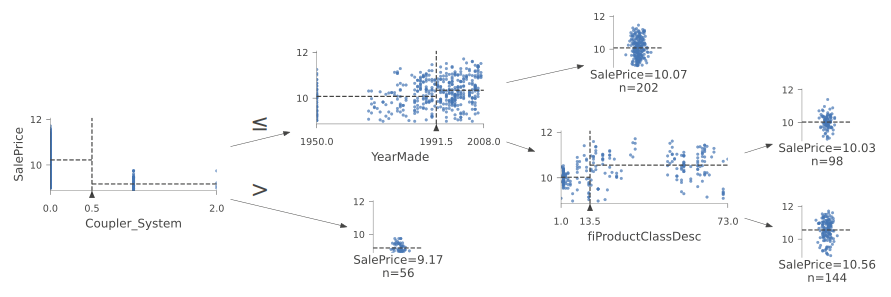

In [55]:
m=DecisionTreeRegressor(max_leaf_nodes=4).fit(xs,y)
viz_model=dtreeviz.model(m,
X_train=xs.iloc[samp_idx],
y_train=y.iloc[samp_idx],
feature_names=xs.columns,
target_name=dep_var)

viz_model.view(fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
orientation='LR')



In [56]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()),6)
def m_rmse(m,xs,y): return r_mse(m.predict(xs),y)

In [57]:
m_rmse(m,valid_xs,valid_y)

0.570833

In [58]:
m_rmse(m,xs,y)

0.560685

In [59]:
m.get_n_leaves(),len(xs)

(4, 404710)

In [60]:
m=DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs,to.train.y)
m_rmse(m,xs,y),m_rmse(m,valid_xs,valid_y)


(0.245956, 0.314895)

In [61]:
m.get_n_leaves()

12374

In [62]:
def rf(xs,y,n_estimators=40,max_samples=200000,
      max_features=0.5,min_samples_leaf=5,**kwargs):
    return RandomForestRegressor(n_jobs=-1,n_estimators=n_estimators,
                                max_samples=max_samples,max_features=max_features,
                                min_samples_leaf=min_samples_leaf,oob_score=True).fit(xs,y)


In [63]:
m=rf(xs,y,n_estimators=100)

In [64]:
m_rmse(m,xs,y),m_rmse(m,valid_xs,valid_y)

(0.169817, 0.232863)

In [65]:
valid_xs[:1]

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,saleDay,saleDayofweek,saleDayofyear,saleElapsed
22915,2,2301,706,43,...,3,0,276,1.317600e+09


In [66]:
preds=np.stack([t.predict(valid_xs) for t in m.estimators_])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X 

In [67]:
preds_std=preds.std(0)

In [68]:
preds_std[:5]

array([0.2652592 , 0.12502187, 0.09999697, 0.25756722, 0.13077148])

In [69]:
def rf_feat_importance(m,df):
    return pd.DataFrame({'cols':df.columns,'imp':m.feature_importances_}).sort_values('imp',ascending=False)

In [70]:
fi=rf_feat_importance(m,xs)
len(fi),fi[:10]

(66,
                   cols       imp
 57            YearMade  0.171066
 30      Coupler_System  0.115111
 7   fiProductClassDesc  0.088815
 6          ProductSize  0.080462
 54             ModelID  0.056654
 65         saleElapsed  0.050137
 31      Grouser_Tracks  0.049850
 3      fiSecondaryDesc  0.048693
 1          fiModelDesc  0.036417
 12           Enclosure  0.034581)

<Axes: ylabel='cols'>

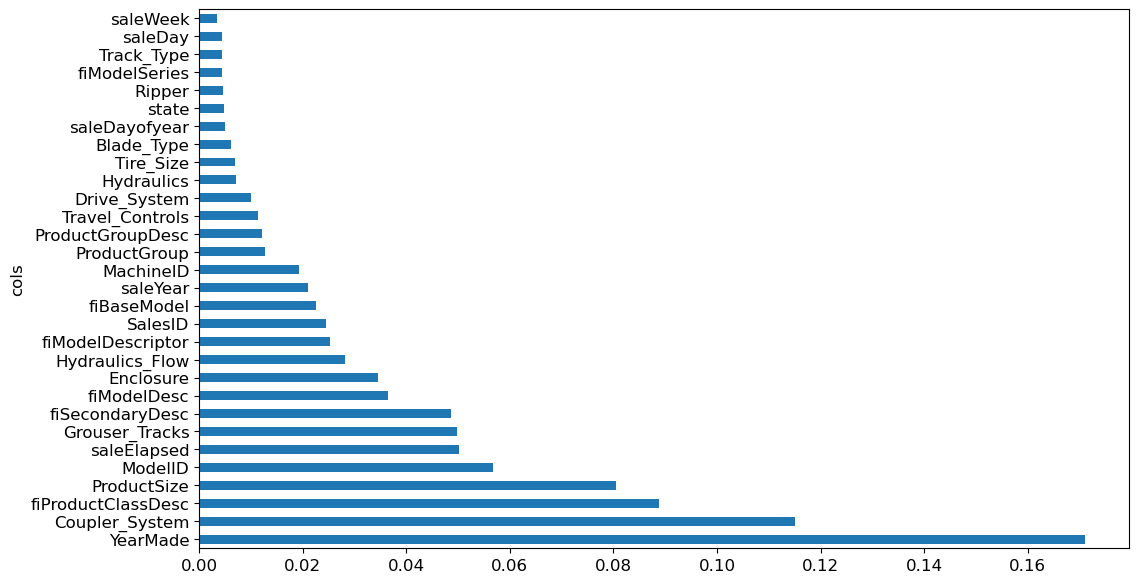

In [71]:
def plot_fi(fi):
    return  fi.plot('cols','imp','barh',figsize=(12,7),legend=False)

plot_fi(fi[:30])
    

In [72]:
fi.columns

Index(['cols', 'imp'], dtype='object')

In [73]:
to_keep=fi[fi['imp']>0.005].cols
len(to_keep)

23

In [74]:
xs_imp=xs[to_keep]
valid_xs_imp=valid_xs[to_keep]

In [75]:
m=rf(xs_imp,y)

In [76]:
m_rmse(m,xs_imp,y),m_rmse(m,valid_xs_imp,valid_y)

(0.181136, 0.232731)

In [77]:
len(xs.columns),len(xs_imp.columns)

(66, 23)

<Axes: ylabel='cols'>

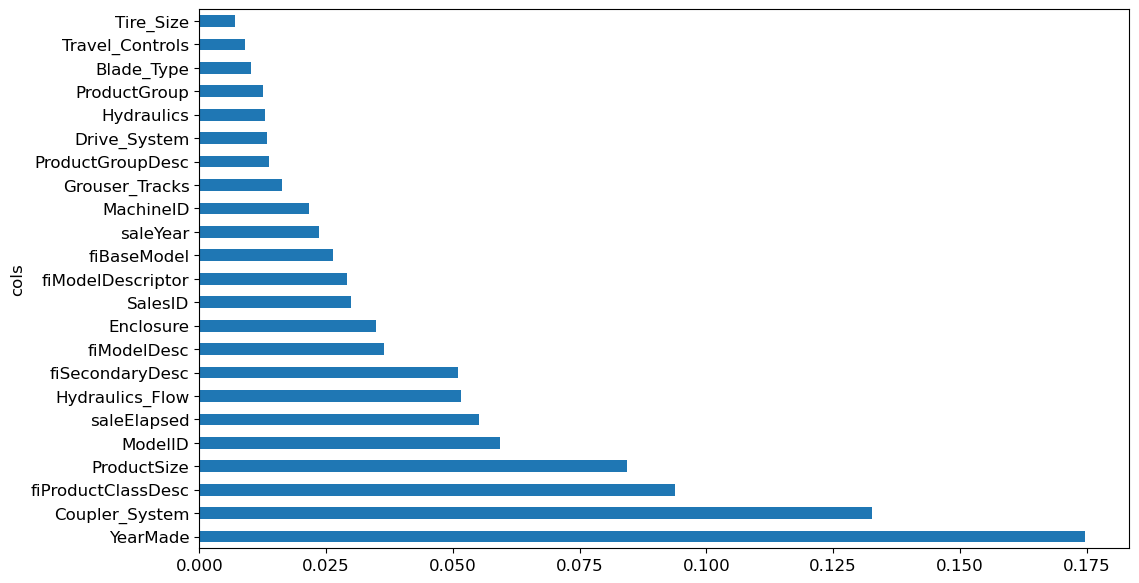

In [78]:
fi_after=rf_feat_importance(m,xs_imp)
plot_fi(fi_after)

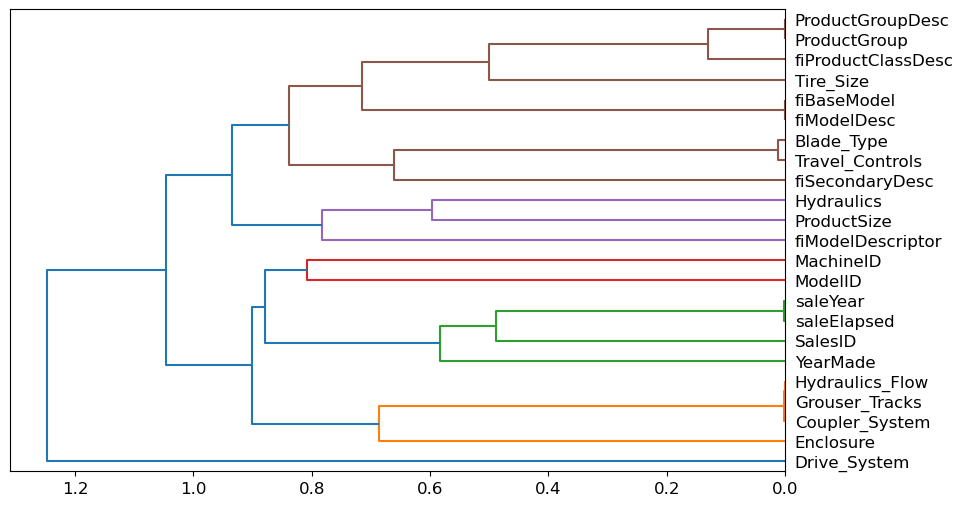

In [79]:
cluster_columns(xs_imp)

In [80]:
def get_oob(df):
    m=RandomForestRegressor(n_estimators=40,min_samples_leaf=15,
                           max_samples=50000,max_features=0.5,n_jobs=-1,oob_score=True)
    m.fit(df,y)
    return m.oob_score_

In [81]:
get_oob(xs_imp)

0.8751368094957704

In [82]:
{c:get_oob(xs_imp.drop(c,axis=1)) for c in (
    'saleYear', 'saleElapsed', 'ProductGroupDesc','ProductGroup',
    'fiModelDesc', 'fiBaseModel',
    'Hydraulics_Flow','Grouser_Tracks', 'Coupler_System')}

{'saleYear': 0.8753805553915275,
 'saleElapsed': 0.8707804321299439,
 'ProductGroupDesc': 0.875866993643484,
 'ProductGroup': 0.8768223024550423,
 'fiModelDesc': 0.8739886345213949,
 'fiBaseModel': 0.8748818627870187,
 'Hydraulics_Flow': 0.8762751500168224,
 'Grouser_Tracks': 0.8769602707852804,
 'Coupler_System': 0.8771084457442139}

In [83]:
to_drop=['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop,axis=1))

0.8727889151001635

In [84]:
xs_final=xs_imp.drop(to_drop,axis=1)
valid_xs_final=valid_xs_imp.drop(to_drop,axis=1)


In [85]:
save_pickle(path/'xs_final.pkl',xs_final)
save_pickle(path/'valid_xs_final.pkl',valid_xs_final)

In [86]:
xs_final = load_pickle(path/'xs_final.pkl')
valid_xs_final = load_pickle(path/'valid_xs_final.pkl')

In [87]:
m=rf(xs_final,y)
m_rmse(m,xs_final,y),m_rmse(m,valid_xs_final,valid_y)

(0.183322, 0.233555)

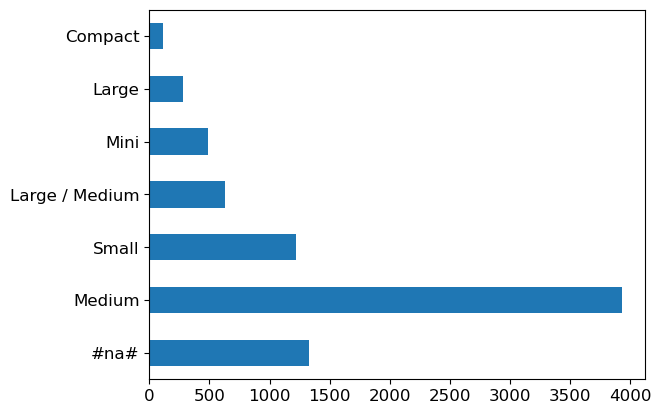

In [88]:
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c);

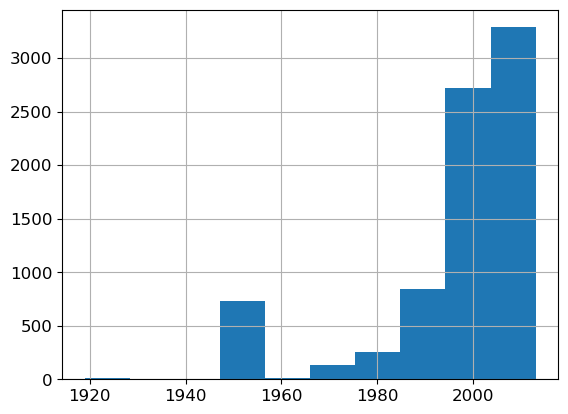

In [89]:
ax=valid_xs_final['YearMade'].hist()

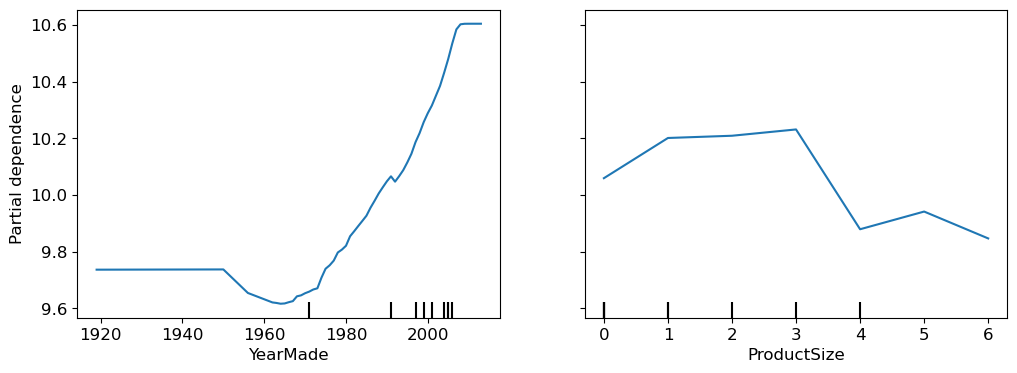

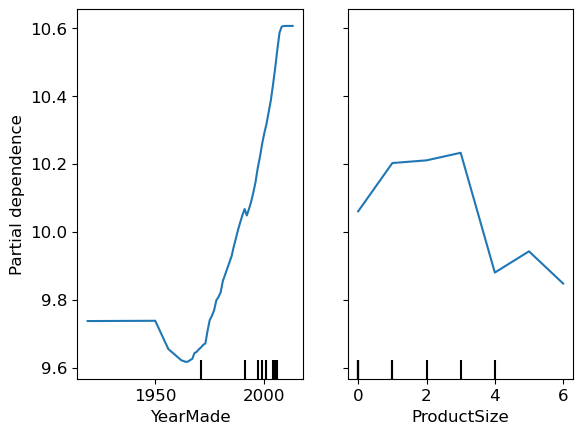

In [90]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12,4))
display = PartialDependenceDisplay.from_estimator(m,
                valid_xs_final, features=['YearMade', 'ProductSize'])
display.plot(ax=ax)



In [91]:
!pip install treeinterpreter
!pip install waterfallcharts

  Preparing metadata (setup.py) ... done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3415 sha256=3a2705cfd54424754be259129b414793161ae72299a5c730a10663202c1c60a0
  Stored in directory: /root/.cache/pip/wheels/bd/34/6c/58fce34a3b8ec5607aff650db14ceb41db8223ac217423371b
Successfully built waterfallcharts


In [92]:

import warnings
warnings.simplefilter('ignore',FutureWarning)
from  treeinterpreter import treeinterpreter 
from waterfall_chart  import plot as waterfall 

     


In [93]:
row=valid_xs_final.iloc[:5]

In [94]:
predictions,bias,contributions=treeinterpreter.predict(m,row.values)

In [95]:
predictions[0],bias[0],contributions[0].sum()

(array([10.01842226]), 10.104269694486261, -0.08584743689135622)

In [96]:
bias[0]+contributions[0].sum()

10.018422257594905

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

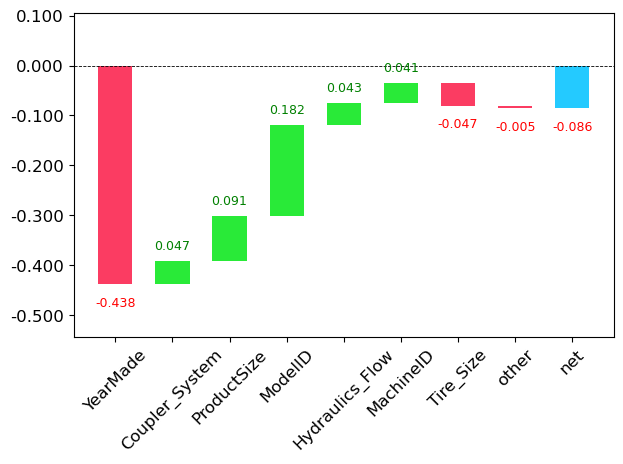

In [97]:
waterfall(valid_xs_final.columns,contributions[0],threshold=0.08,
         rotation_value=45,formatting='{:,.3f}')


Extrapolation and Neural Networks

In [98]:
np.random.seed(42)

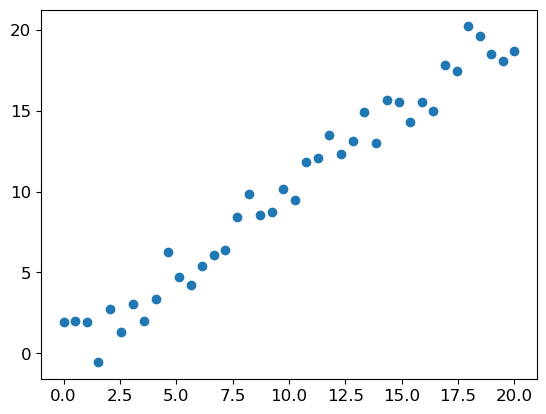

In [99]:
x_lin=torch.linspace(0,20,steps=40)
y_lin=x_lin + torch.randn_like(x_lin)
plt.scatter(x_lin,y_lin)

In [100]:
xs_lin=x_lin.unsqueeze(1)
x_lin.shape,xs_lin.shape


(torch.Size([40]), torch.Size([40, 1]))

In [101]:
x_lin[:None].shape

torch.Size([40])

In [102]:
m_lin=RandomForestRegressor().fit(xs_lin[:30],y_lin[:30])

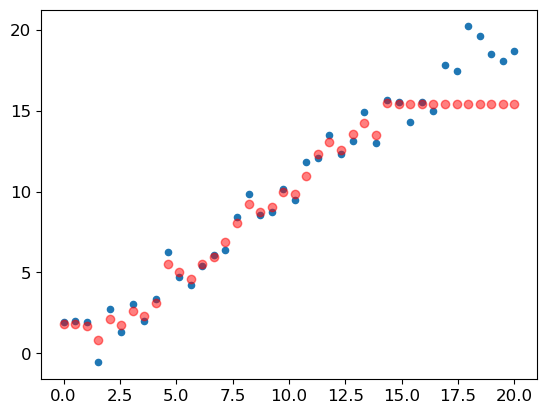

In [103]:
plt.scatter(x_lin,y_lin,20)
plt.scatter(x_lin,m_lin.predict(xs_lin),color='red',alpha=0.5)



     


In [104]:
df_dom=pd.concat([xs_final,valid_xs_final])
is_valid=np.array([0]*len(xs_final)+[1]*len(valid_xs_final))

m=rf(df_dom,is_valid)
rf_feat_importance(m,df_dom)[:6]

,cols,imp
5,saleElapsed,0.886462
11,SalesID,0.085968
12,MachineID,0.022363
0,YearMade,0.001852
7,fiModelDesc,0.000692
4,ModelID,0.000668


In [105]:
m=rf(xs_final,y)
print('orig',m_rmse(m,valid_xs_final,valid_y))

for c in ('SalesID','saleElapsed','MachineID'):
    m=rf(xs_final.drop(c,axis=1),y)
    print(c ,m_rmse(m,valid_xs_final.drop(c,axis=1), valid_y)) 

orig 0.233125
SalesID 0.232078
saleElapsed 0.236863
MachineID 0.232138


In [106]:
time_vars=['SalesID','MachineID']
xs_final_time=xs_final.drop(time_vars,axis=1)
valid_xs_time=valid_xs_final.drop(time_vars,axis=1)
m=rf(xs_final_time,y)
m_rmse(m,valid_xs_time,valid_y)

0.229683

<Axes: >

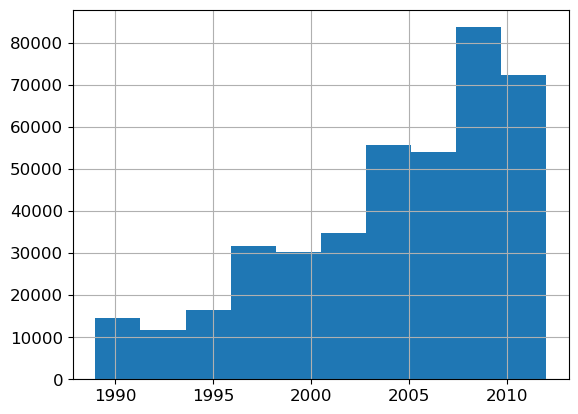

In [107]:
xs['saleYear'].hist()

In [108]:
filt=xs['saleYear']>2004
xs_filt=xs_final_time[filt]
y_filt=y[filt]

In [109]:


m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)
     


(0.17709, 0.228811)

In [111]:
df_nn=pd.read_csv(path/'TrainAndValid.csv',low_memory=False)
df_nn['ProductSize']=df_nn["ProductSize"].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes,ordered=True,inplace=True)
df_nn[dep_var]=np.log(df_nn[dep_var])
df_nn=add_datepart(df_nn,'saledate')

In [112]:
df_nn_final=df_nn[list(xs_final_time.columns) + [dep_var]]

In [115]:
cont_nn,cat_nn=cont_cat_split(df_nn_final,max_card=9000,dep_var=dep_var)

In [118]:
df_nn_final[cat_nn].nunique()

YearMade                73
Coupler_System           2
fiProductClassDesc      74
ProductSize              6
ModelID               5281
fiSecondaryDesc        177
fiModelDesc           5059
Enclosure                6
Hydraulics_Flow          3
fiModelDescriptor      140
ProductGroup             6
Travel_Controls          7
Drive_System             4
Hydraulics              12
Tire_Size               17
Blade_Type              10
dtype: int64

In [119]:
xs_filt2=xs_filt.drop('fiModelDescriptor', axis=1)
valid_xs_time2=valid_xs_time.drop('fiModelDescriptor', axis=1)
m2=rf(xs_filt2,y_filt)

In [120]:
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)

(0.176455, 0.229276)

In [121]:
cat_nn.remove('fiModelDescriptor')

In [124]:
procs_nn=[Categorify,FillMissing,Normalize]
to_nn=TabularPandas(df_nn_final,procs_nn,cat_nn,cont_nn,
                   splits=splits,y_names=dep_var)

In [125]:
dls=to_nn.dataloaders(1024)

In [126]:
y=to_nn.train.y
y.min(),y.max()

(8.465899, 11.863583)

In [128]:
learn=tabular_learner(dls,y_range=(8,12) , layers=[500,250],
                     n_out=1,loss_func=F.mse_loss)

SuggestedLRs(valley=0.00015848931798245758)

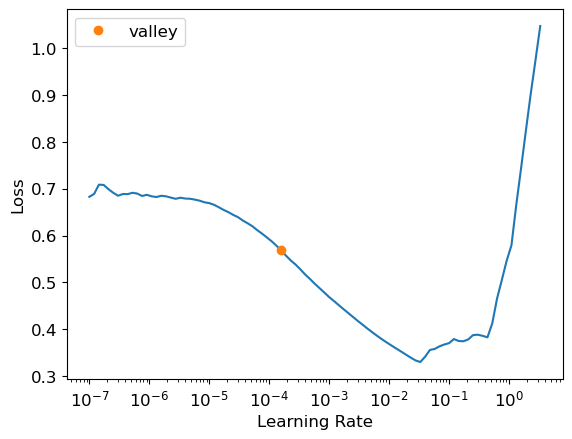

In [130]:
learn.lr_find()

In [131]:
learn.fit_one_cycle(5,1e-2)

epoch,train_loss,valid_loss,time
0,0.062363,0.063264,00:14
1,0.053459,0.054594,00:14
2,0.047600,0.062133,00:14
3,0.043320,0.051086,00:14
4,0.040235,0.050605,00:13


In [132]:
preds,targs=learn.get_preds()
r_mse(preds,targs)

0.224956

In [133]:


learn.save('nn')
     


Path('models/nn.pth')

In [136]:
!ls models


nn.pth
